In [1]:
import os
import pandas
import numpy as np
import nibabel as ni
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from glob import glob



In [62]:
# matfile
matfile = '/Users/jakevogel/Science/tau/ESM_tau/results/March2018/ESM_lit_RW_MMC2_p.mat'
mat = loadmat(matfile)

In [44]:
# reference dataframe
refsht = '/Users/jakevogel/Science/tau/ADNI_MASTER.csv'
refdf = pandas.read_csv(refsht)


In [27]:
#scans = sorted(glob('/Users/jakevogel/Science/tau/nan_snorm_*'))
#sids = [x.split('/')[-1].split('_')[2] for x in scans]
#sids[0]
sidf = pandas.read_csv('/Users/jakevogel/Science/tau/braak_stage_rois.csv')
gind = sidf.AGE.dropna().index
sids = sidf.loc[gind,'subject'].values

In [23]:
len(sids)

236

In [255]:
! ls -lrth /Users/jakevogel/Science/tau/

total 5013120
-rw-rw-r--@  1 jakevogel  staff    14M Aug 20  2016 MNI152_T1_1mm_brain.nii
-rw-rw-r--@  1 jakevogel  staff   2.1M Sep 23  2016 test_4815.nii.gz
-rw-r--r--@  1 jakevogel  staff   120K Dec 14  2016 nii_dkt_atlas_1p5mm.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_002-S-4262_18F-AV1451_2016-02-25_P4_I651320.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_002-S-4521_18F-AV1451_2016-04-05_P4_I730844.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_002-S-4654_18F-AV1451_2016-04-21_P4_I699996.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_002-S-4799_18F-AV1451_2016-07-27_P4_I767572.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_007-S-2394_18F-AV1451_2016-07-19_P4_I762869.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_007-S-4620_18F-AV1451_2016-07-15_P4_I761155.nii.gz

-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_012-S-4643_18F-AV1451

In [5]:
# reference dataframe
sht = '/Users/jakevogel/Science/tau/tau_adni_demo_cogchange_litROIs_earlytau.csv'
df = pandas.read_csv(sht)
df.head()

,Unnamed: 0,subs,subs.1,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.2,RID,SITE,COLPROT,ORIGPROT,...,brain_partition_consensus_ind_lund_sci5_scf5_5,lund_ET_3_1,lund_ET_3_2,lund_ET_3_3,lund_ET_6_1,lund_ET_6_2,lund_ET_6_3,lund_ET_6_4,lund_ET_6_5,lund_ET_6_6
0,0,002-S-4229,002-S-4229,002-S-4229,002-S-4229,002-S-4229,4229.0,2.0,ADNI2,ADNI2,...,1.001502,1.348725,1.067139,1.103361,1.348725,1.115261,1.081559,1.238158,1.103050,1.051729
1,1,002-S-4262,002-S-4262,002-S-4262,002-S-4262,002-S-4262,4262.0,2.0,ADNI2,ADNI2,...,1.145301,1.507033,1.165363,1.106672,1.507033,1.120392,1.141073,1.190362,1.182348,1.090506
2,2,002-S-4521,002-S-4521,002-S-4521,002-S-4521,002-S-4521,4521.0,2.0,ADNI2,ADNI2,...,1.250661,1.542644,1.144523,1.285093,1.542644,1.314419,1.292172,1.414967,1.184433,1.141633
3,3,002-S-4654,002-S-4654,002-S-4654,002-S-4654,002-S-4654,4654.0,2.0,ADNI2,ADNI2,...,1.186976,1.198241,1.018570,0.983168,1.198241,0.974095,1.043101,1.081553,1.044473,0.990339
4,4,002-S-4799,002-S-4799,002-S-4799,002-S-4799,002-S-4799,4799.0,2.0,ADNI2,ADNI2,...,1.095576,1.542920,1.317958,1.241442,1.542920,1.250776,1.319128,1.337707,1.332920,1.262309


In [6]:
all([x in df.subs.tolist() for x in sids])

True

In [7]:
mat.keys()

dict_keys(['Final_times', 'Final_RMSEs', 'Final_solutions', 'Final_CORRs', 'Nparameters', '__header__', 'Nnodes', 'num_repetitions', 'MUS0', 'h_integration', 'time_range', 'Long_Matrix', 'ONSETS_est', '__globals__', 'AGEs', 'DELTAS0', 'DELTAS_est', 'Nmodels', 'BETAS0', 'Final_parameters', 'models', 'Conn_Matrix', '__version__', 'SIGMAS0', 'BETAS_est', 'Nsubjects', 'ref_pattern'])

In [8]:
mat['models'][0,0][0][0]

array([19, 58,  1], dtype=uint8)

In [6]:
labs = pandas.read_csv('/Users/jakevogel/git/pycourse_vuMC/stuff/dst_labels.csv', header=None)
labs.columns = ['integer_label', 'label']
labs.head()

,integer_label,label
0,1,Caudal anterior cingulate
1,2,Caudal middle frontal
2,3,Cuneus
3,4,entorinal
4,5,fusiform


In [9]:
mat.keys()

dict_keys(['Conn_Matrix', 'model_solutions0', 'model_RMSEs0', 'time_range', 'DELTAS0', 'AGEs', '__globals__', 'model_times0', 'MUS0', 'SIGMAS0', 'h_integration', 'Nsubjects', 'num_repetitions', 'Nparameters', 'BETAS0', '__version__', 'model_parameters0', '__header__', 'Long_Matrix', 'model_CORRs0', 'ref_pattern'])

In [18]:
mat['model_RMSEs0'].flatten().shape

(236,)

In [25]:
def get_results(mat, sids, save=True, labels = None, lit = False):

    if not lit:
        res = pandas.DataFrame(index = sids)
        for i in range(len(mat['ref_pattern'][0])):
            # Model fits
            sid = sids[i]
            r,p = stats.pearsonr(mat['ref_pattern'][:,i], mat['Final_solutions'][:,i])
            res.loc[sid,'model_r'] = r
            res.loc[sid,'model_r2'] = r**2
        res.loc[:, 'model_RMSE'] = mat['Final_RMSEs'].flatten()
        res.loc[:, 'model_eval'] = mat['Final_CORRs'].flatten()

        if save:
            # params
            res.loc[:, 'beta'] = mat['Final_parameters'][0,:].flatten()
            res.loc[:, 'delta'] = mat['Final_parameters'][1,:].flatten()
            res.loc[:, 'sigma'] = mat['Final_parameters'][2,:].flatten()

            # other
            res.loc[:, 'ref_age'] = mat['AGEs'].flatten()
            res.loc[:, 'times'] = mat['Final_times'].flatten()
            res.loc[:, 'Onset_age'] = mat['ONSETS_est'].flatten()

        print('average r2 = ', res.model_r2.mean())
        print('average RMSE =', res.model_RMSE.mean())
        print('average eval =', res.model_eval.mean())

        if type(labels) != type(None):
            print('model identfied the following epicenters')
            for l in mat['models'][0,0][0][0]:
                print(labels.iloc[l-1]['label'])

        if save:
            return res
        
    else:
        res = pandas.DataFrame(index = sids)
        for i in range(len(mat['ref_pattern'][0])):
            # Model fits
            sid = sids[i]
            r,p = stats.pearsonr(mat['ref_pattern'][:,i], mat['model_solutions0'][:,i])
            res.loc[sid,'model_r'] = r
            res.loc[sid,'model_r2'] = r**2
        res.loc[:, 'model_RMSE'] = mat['model_RMSEs0'].flatten()
        res.loc[:, 'model_eval'] = mat['model_CORRs0'].flatten()

        if save:
            # params
            res.loc[:, 'beta'] = mat['model_parameters0'][0,:].flatten()
            res.loc[:, 'delta'] = mat['model_parameters0'][1,:].flatten()
            res.loc[:, 'sigma'] = mat['model_parameters0'][2,:].flatten()

            # other
            res.loc[:, 'ref_age'] = mat['AGEs'].flatten()
            res.loc[:, 'times'] = mat['model_times0'].flatten()
            #res.loc[:, 'Onset_age'] = mat['ONSETS_est'].flatten()

        print('average r2 = ', res.model_r2.mean())
        print('average RMSE =', res.model_RMSE.mean())
        print('average eval =', res.model_eval.mean())

        #if type(labels) != type(None):
        #    print('model identfied the following epicenters')
        #    for l in mat['models'][0,0][0][0]:
        #        print(labels.iloc[l-1]['label'])

        if save:
            return res

In [63]:
#res = get_results(mat, sids, labels=labs)
res = get_results(mat, sids, labels=labs, lit=True) #RW MMC2

average r2 =  0.2100235457356556
average RMSE = 0.23565004317164645
average eval = 0.5163690166852205


In [53]:
#res = get_results(mat, sids, labels=labs)
res = get_results(mat, sids, labels=labs, lit=True) #VW MMC2

average r2 =  0.026180425993113734
average RMSE = 0.02540973353471446
average eval = 4.644414665034114


In [45]:
#res = get_results(mat, sids, labels=labs)
res = get_results(mat, sids, labels=labs, lit=True) #Ref_normed

average r2 =  0.09237954348242015
average RMSE = 0.14806691792068957
average eval = 0.7869650098587192


In [12]:
df.columns[18:30]

Index(['APOE4', 'FDG', 'PIB', 'AV45', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE',
       'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting',
       'RAVLT_perc_forgetting'],
      dtype='object')

In [ ]:
sidf.A

In [64]:
# add demos
#res.loc[:,'amyloid'] = df.av45_status_wcb.values
#res.loc[:,'DX'] = df.DX_final.values
#res.loc[:,'Age'] = df.AGE.values
#res.loc[:,'Gender'] = df.PTGENDER.values
#res.loc[:,'Education'] = df.PTEDUCAT.values
#res.loc[:,'ApoE4'] = df.APOE4.values

res.loc[:,'amyloid'] = sidf.loc[gind].av45_status.values
res.loc[:,'DX'] = sidf.loc[gind].DX_fill.values
res.loc[:,'Age'] = sidf.loc[gind].AGE.values
res.loc[:,'Gender'] = sidf.loc[gind].PTGENDER.values
res.loc[:,'Education'] = sidf.loc[gind].PTEDUCAT.values
res.loc[:,'ApoE4'] = sidf.loc[gind].APOE4.values

In [65]:
res.Age.mean()

71.34576271186438

In [66]:
res.ref_age.mean()

71.34576271186438

In [67]:
refdf.index = [x.replace('_','-') for x in refdf.PTID]

AttributeError: 'float' object has no attribute 'replace'

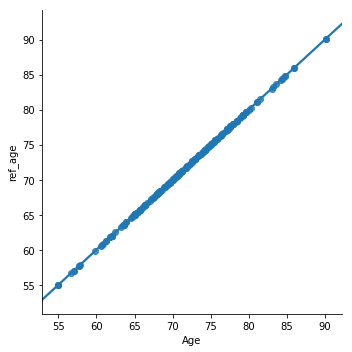

In [68]:
plt.close()
sns.lmplot('Age','ref_age',data=res)
plt.show()

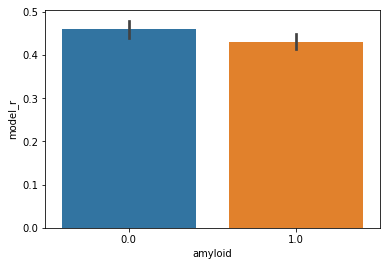

In [69]:
plt.close()
sns.barplot('amyloid','model_r',data=res)
plt.show()

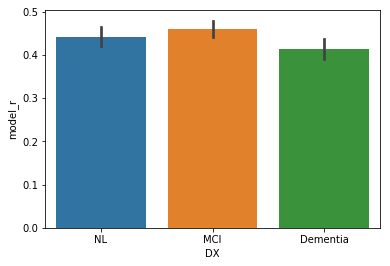

In [70]:
plt.close()
sns.barplot('DX','model_r',data=res)
plt.show()

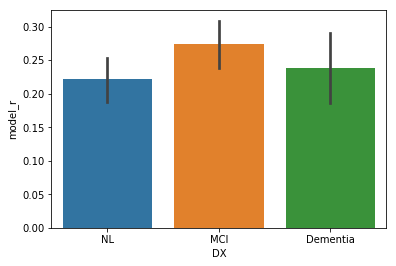

In [50]:
plt.close()
sns.barplot('DX','model_r',data=res)
plt.show()

In [71]:
for col in res.columns[:10]:
    t,p = stats.ttest_ind(res[res.amyloid==0][col],
                         res[res.amyloid==1][col])
    if p<0.05:
        print(col,t,p)

model_r 2.1258192561 0.0345660273281
model_r2 2.74629171416 0.00649590239212
delta -2.75735377912 0.00628692329553
ref_age -2.70665569496 0.00729732240497
amyloid -inf 0.0


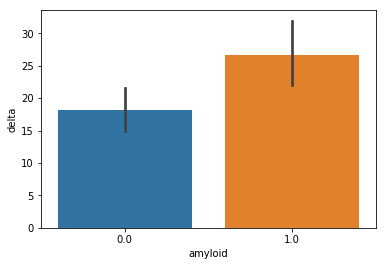

In [72]:
plt.close()
sns.barplot('amyloid','delta',data=res)
plt.show()

In [73]:
for col in res.columns[:10]:
    f,p = stats.f_oneway(res[res.DX=='NL'][col],
                         res[res.DX=='MCI'][col],
                        res[res.DX=='Dementia'][col])
    if p<0.05:
        print(col,f,p)

model_r2 3.23653869089 0.041073320039
amyloid 18.1980116011 4.5330684855e-08


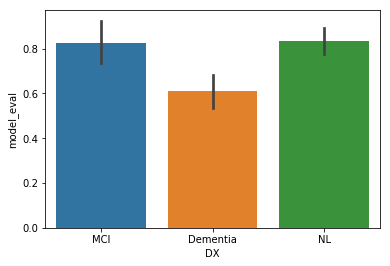

In [24]:
plt.close()
sns.barplot('DX','model_eval',data=res)
plt.show()

In [74]:
res2 = pandas.DataFrame(res,copy=True)
res2.loc[:,'subid'] = res2.index
res2.index = range(res2.shape[0])

In [75]:
res2.loc[:,'DX_AB'] = [res2.loc[x,'DX']+'+' if res2.loc[x,'amyloid']==1 else res2.loc[x,'DX']+'-' for x in res2.index]

In [76]:
nres = pandas.DataFrame(res2,copy=True)

In [77]:
nres.loc[:,'DX_AB'] = [nres.loc[x,'DX']+'+' if nres.loc[x,'amyloid']==1 else nres.loc[x,'DX']+'-' for x in nres.index]

In [78]:
for col in res.columns[:10]:
    f,p = stats.f_oneway(nres[nres.DX_AB=='NL-'][col],
                         nres[nres.DX_AB=='NL+'][col],
                         nres[nres.DX_AB=='MCI-'][col],
                         nres[nres.DX_AB=='MCI+'][col],
                        nres[nres.DX_AB=='Dementia+'][col])
    if p<0.1:
        print(col,f,p)

model_r 2.03167713144 0.0908127335746
model_r2 2.98241560395 0.0198895056797
delta 1.98864364375 0.0970774177315
ref_age 2.03342438307 0.0905666517751
times 2.03040427604 0.090992400927


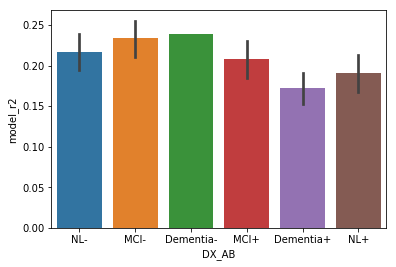

In [80]:
plt.close()
sns.barplot('DX_AB','model_r2',data=res2)
plt.show()

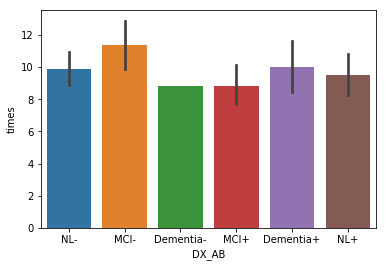

In [83]:
plt.close()
sns.barplot('DX_AB','times',data=res2)
plt.show()

In [81]:
for col in res.columns[:10]:
    t,p = stats.ttest_ind(res[res.ApoE4==0][col],
                         res[res.ApoE4==1][col])
    if p<0.05:
        print(col,t,p)

ref_age 3.27152376404 0.00124516675904
times 2.82675860841 0.00514365738869
amyloid -3.97320124571 9.664771435e-05


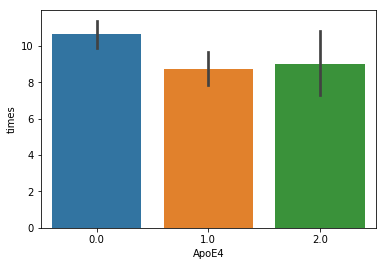

In [84]:
plt.close()
sns.barplot('ApoE4','times',data=res2)
plt.show()

In [85]:
for col in res.columns[:10]:
    t,p = stats.ttest_ind(res[res.Gender==0][col],
                         res[res.Gender==1][col])
    if p<0.05:
        print(col,t,p)

In [86]:
for col in res.columns[:10]:
    r,p = stats.pearsonr(res[col], res['Education'])
    if p<0.05:
        print(col,r,p)

amyloid -0.168715076835 0.00941159127747


In [33]:
# look at regional accuracy across subjects
# look at subject accuracy across regions
# look at relationship between total tau(P) and model fit params
# make average images for disease-ab groups for true and predicted probabilities
# examine probability metrics



In [34]:
mat.keys()

dict_keys(['Final_times', 'Final_RMSEs', 'Final_solutions', 'Final_CORRs', 'Nparameters', '__header__', 'Nnodes', 'num_repetitions', 'MUS0', 'h_integration', 'time_range', 'Long_Matrix', 'ONSETS_est', '__globals__', 'AGEs', 'DELTAS0', 'DELTAS_est', 'Nmodels', 'BETAS0', 'Final_parameters', 'models', 'Conn_Matrix', '__version__', 'SIGMAS0', 'BETAS_est', 'Nsubjects', 'ref_pattern'])

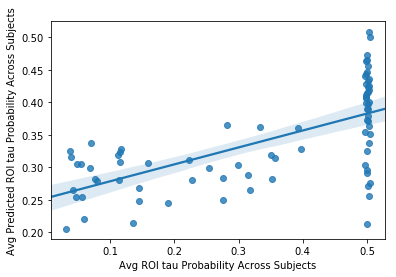

r2 =  0.415933682503


In [90]:
# look at regional accuracy across subjects
plt.close()
#sns.regplot(mat['ref_pattern'].mean(1), mat['Final_solutions'].mean(1))
sns.regplot(mat['ref_pattern'].mean(1), mat['model_solutions0'].mean(1))
plt.xlabel('Avg ROI tau Probability Across Subjects')
plt.ylabel('Avg Predicted ROI tau Probability Across Subjects')
plt.show()
r,p = stats.pearsonr(mat['ref_pattern'].mean(1), mat['model_solutions0'].mean(1))
print('r2 = ',r**2)

In [36]:
jnk = mat['ref_pattern'].mean(1)
[i for i in range(len(jnk)) if jnk[i] <0.49]

[34, 38, 73, 77]

In [60]:
labs.loc[77]

integer_label           78
label             Thalamus
Name: 77, dtype: object

In [49]:
lablist = list(range(len(mat['ref_pattern'].mean(1))))
todel = [i for i in range(len(jnk)) if jnk[i] <0.49]
for i,lab in enumerate(todel):
    lablist.remove(lab)
jref = mat['ref_pattern'].mean(1)[lablist]
jpred = mat['Final_solutions'].mean(1)[lablist]

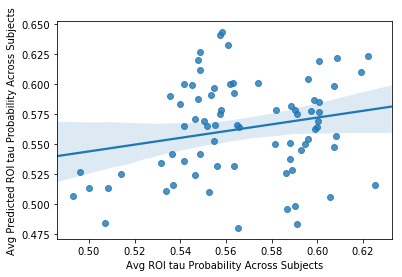

In [52]:
# look at regional accuracy across subjects
plt.close()
sns.regplot(jref, jpred)
plt.xlabel('Avg ROI tau Probability Across Subjects')
plt.ylabel('Avg Predicted ROI tau Probability Across Subjects')
plt.show()

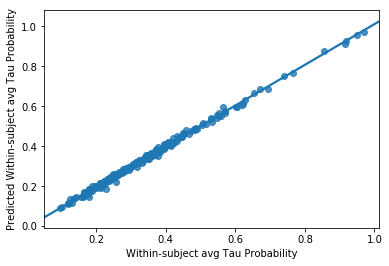

In [91]:
# look at subject accuracy across regions
plt.close()
#sns.regplot(mat['ref_pattern'].mean(0), mat['Final_solutions'].mean(0))
sns.regplot(mat['ref_pattern'].mean(0), mat['model_solutions0'].mean(0))
plt.xlabel('Within-subject avg Tau Probability')
plt.ylabel('Predicted Within-subject avg Tau Probability')
plt.show()

In [94]:
#res.loc[:,'pred_avg_tau_prob'] = mat['Final_solutions'].mean(0)
res.loc[:,'pred_avg_tau_prob'] = mat['model_solutions0'].mean(0)
res.loc[:,'avg_tau_prob'] = mat['ref_pattern'].mean(0)

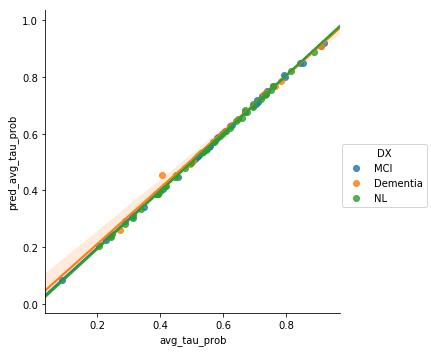

In [47]:
# look at subject accuracy across regions
plt.close()
sns.lmplot('avg_tau_prob', 'pred_avg_tau_prob',data=res,hue='DX')
plt.show()

In [245]:
plt.subplots?

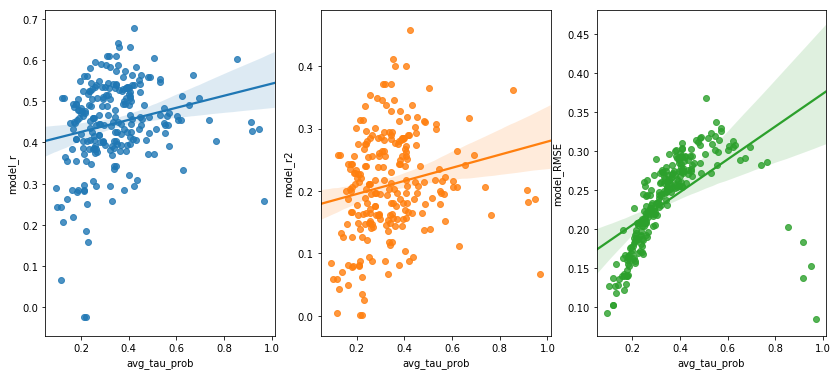

model_r 0.213672984912 0.000955505472297
model_r2 0.193524751309 0.00283140206137
model_RMSE 0.574470477949 4.01286291881e-22


In [95]:
# look at relationship between total tau(P) and model fit params
plt.close()
fig, axes = plt.subplots(ncols=3,sharex=True,figsize = (14,6))
for i,col in enumerate(res.columns[:3]):
    sns.regplot('avg_tau_prob', col, data=res, ax = axes[i])

plt.show()
for col in res.columns[:3]:
    r,p = stats.pearsonr(res[col], res['avg_tau_prob'])
    print(col,r,p)

In [96]:
# make average images for disease-ab groups for true and predicted probabilities
labs = pandas.read_csv('/Users/jakevogel/git/pycourse_vuMC/stuff/dst_labels.csv',header=None)
labs.columns = ['int_lab','str_lab']
labs.str_lab = [x.lstrip() for x in labs.str_lab]
njnk = ni.load('/Users/jakevogel/Science/tau/dkt_atlas_1p5mm.nii')
atl = njnk.get_data()

In [106]:
labs['int_lab'][:78].shape
refT.columns.shape

(78,)

In [117]:
refT = pandas.DataFrame(mat['ref_pattern']).transpose()
refT.index = res2.index
refT.columns = labs['int_lab'][:78]
#predT = pandas.DataFrame(mat['Final_solutions']).transpose()
predT = pandas.DataFrame(mat['model_solutions0']).transpose()
predT.index = res2.index
predT.columns = labs['int_lab'][:78]

In [116]:
res2[res2.DX_AB==dx].index

Int64Index([  0,   1,   4,   6,   9,  15,  16,  17,  18,  20,  21,  22,  23,
             24,  30,  31,  32,  33,  35,  36,  40,  41,  42,  46,  48,  49,
             52,  53,  54,  56,  57,  58,  60,  62,  64,  65,  66,  67,  68,
             73,  75,  77,  78,  80,  82,  83,  85,  86,  87,  88,  90,  92,
             93,  95,  97,  98,  99, 101, 102, 106, 108, 111, 113, 114, 115,
            116, 117, 118, 119, 120, 121, 123, 124, 125],
           dtype='int64')

In [120]:
dfs = {'reference': refT, 'predicted': predT}
for dx in res2.DX_AB.unique():
    for nm,d in dfs.items():
        imap = np.zeros_like(atl)
        sdf = d.loc[res2[res2.DX_AB==dx].index].mean(axis=0) 
        for roi in np.unique(atl)[1:]:
            if roi in labs.int_lab[:78]:
                imap[atl==roi] = sdf[roi]
            else:
                imap[atl==roi] = 0
        nimg = ni.Nifti1Image(imap, njnk.affine)
        inm = 'ESM_%s_values_%s'%(nm,dx)
        nimg.to_filename('/Users/jakevogel/Science/tau/ESM_tau/results/March2018/%s'%inm)
        print('created',inm)

created ESM_reference_values_NL-
created ESM_predicted_values_NL-
created ESM_reference_values_MCI-
created ESM_predicted_values_MCI-
created ESM_reference_values_Dementia-
created ESM_predicted_values_Dementia-
created ESM_reference_values_MCI+
created ESM_predicted_values_MCI+
created ESM_reference_values_Dementia+
created ESM_predicted_values_Dementia+
created ESM_reference_values_NL+
created ESM_predicted_values_NL+


In [324]:
sdf[1]

0.99828769746338442